# Covid-19 Analysis using python language.

> I will do some analysis on the Death rate of the pandemic Covid-19 using python.



- badges: true
- comments: true

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
worldometer_df = pd.read_csv('worldometer_snapshots_April18_to_May18.csv')
worldometer_df = pd.read_csv('worldometers_snapshots_April18_to_September20.csv')
worldometer_df = pd.read_csv('worldometers_snapshots_April18_to_August1.csv')
worldometer_df = pd.read_csv('worldometers_snapshots_April18_to_July30.csv')
worldometer_df = pd.read_csv('worldometers_snapshots_April18_to_July3.csv')
worldometer_df = pd.read_csv('worldometers_snapshots_October11_to_October12.csv')

worldometer_df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-10-11,USA,331552784,118486898.0,7991998,219695.0,5128162.0,14741.0,2644141.0
1,2020-10-11,India,1383826697,86877242.0,7119300,109184.0,6146427.0,8944.0,863689.0
2,2020-10-11,Brazil,212986866,17900000.0,5094979,150506.0,4470165.0,8318.0,474308.0
3,2020-10-11,Russia,145952340,50781349.0,1298718,22597.0,1020442.0,2300.0,255679.0
4,2020-10-11,Colombia,51035485,4173863.0,911316,27834.0,789787.0,2220.0,93695.0
...,...,...,...,...,...,...,...,...,...
423,2020-10-12,Montserrat,4993,483.0,13,1.0,12.0,NaN,0.0
424,2020-10-12,Falkland Islands,3508,2682.0,13,NaN,13.0,NaN,0.0
425,2020-10-12,Western Sahara,601379,NaN,10,1.0,8.0,NaN,1.0
426,2020-10-12,Anguilla,15041,1329.0,3,NaN,3.0,NaN,0.0


In [ ]:
country_name = 'Bangladesh'

country_df = worldometer_df.loc[worldometer_df['Country'] == country_name, :].reset_index(drop=True)
country_df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-10-11,Bangladesh,165151528,2070995.0,378266,5524.0,292860.0,NaN,79882.0
1,2020-10-12,Bangladesh,165151528,2084222.0,379738,5555.0,294391.0,NaN,79792.0


In [ ]:
selected_date = datetime.strptime('10/11/2020', '%d/%m/%Y')

selected_date_df = worldometer_df.loc[worldometer_df['Date'] == selected_date.strftime('%Y-%m-%d'), :].reset_index(drop=True)
selected_date_df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases


In [ ]:
last_date = datetime.strptime('12/10/2020', '%d/%m/%Y')

last_date_df = worldometer_df.loc[worldometer_df['Date'] == last_date.strftime('%Y-%m-%d'), :].reset_index(drop=True)
last_date_df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-10-12,USA,331552784,119497624.0,8037789,220011.0,5184615.0,14914.0,2633163.0
1,2020-10-12,India,1383826697,87872093.0,7173565,109894.0,6224792.0,8944.0,838879.0
2,2020-10-12,Brazil,212986866,17900000.0,5103408,150709.0,4495269.0,8318.0,457430.0
3,2020-10-12,Russia,145952340,51191309.0,1312310,22722.0,1024235.0,2300.0,265353.0
4,2020-10-12,Colombia,51035485,4202181.0,919083,27985.0,798396.0,2220.0,92702.0
...,...,...,...,...,...,...,...,...,...
209,2020-10-12,Montserrat,4993,483.0,13,1.0,12.0,NaN,0.0
210,2020-10-12,Falkland Islands,3508,2682.0,13,NaN,13.0,NaN,0.0
211,2020-10-12,Western Sahara,601379,NaN,10,1.0,8.0,NaN,1.0
212,2020-10-12,Anguilla,15041,1329.0,3,NaN,3.0,NaN,0.0


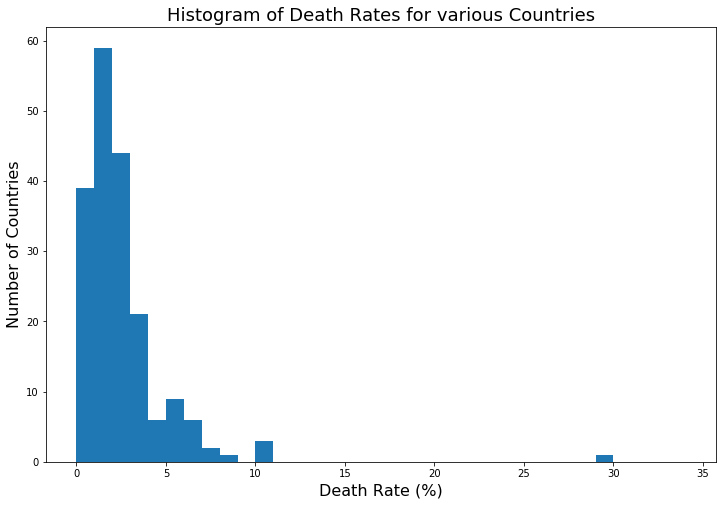

In [ ]:
last_date_df['Case Fatality Ratio'] = last_date_df['Total Deaths'] / last_date_df['Total Cases']

plt.figure(figsize=(12,8))
plt.hist(100 * np.array(last_date_df['Case Fatality Ratio']), bins=np.arange(35))
plt.xlabel('Death Rate (%)', fontsize=16)
plt.ylabel('Number of Countries', fontsize=16)
plt.title('Histogram of Death Rates for various Countries', fontsize=18)
plt.show()

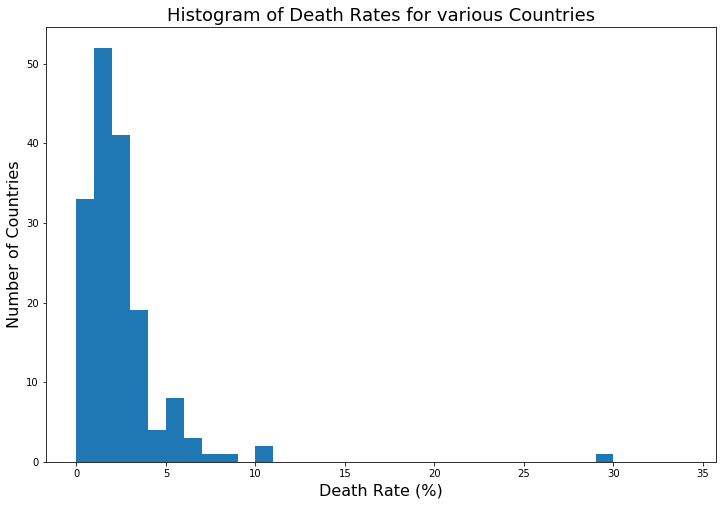

In [ ]:
min_number_of_cases = 1000

greatly_affected_df = last_date_df.loc[last_date_df['Total Cases'] > min_number_of_cases,:]

plt.figure(figsize=(12,8))
plt.hist(100 * np.array(greatly_affected_df['Case Fatality Ratio']), bins=np.arange(35))
plt.xlabel('Death Rate (%)', fontsize=16)
plt.ylabel('Number of Countries', fontsize=16)
plt.title('Histogram of Death Rates for various Countries', fontsize=18)
plt.show()

posx and posy should be finite values
posx and posy should be finite values


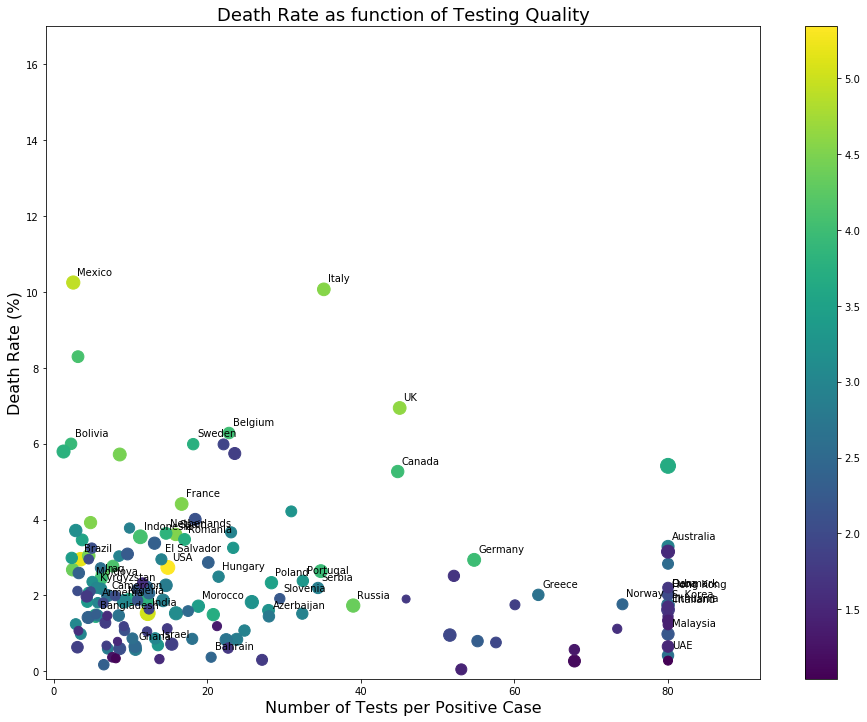

In [ ]:
last_date_df['Num Tests per Positive Case'] = last_date_df['Total Tests'] / last_date_df['Total Cases']

min_number_of_cases = 1000
greatly_affected_df = last_date_df.loc[last_date_df['Total Cases'] > min_number_of_cases,:]

x_axis_limit = 80

death_rate_percent = 100 * np.array(greatly_affected_df['Case Fatality Ratio'])
num_test_per_positive = np.array(greatly_affected_df['Num Tests per Positive Case'])
num_test_per_positive[num_test_per_positive > x_axis_limit] = x_axis_limit
total_num_deaths = np.array(greatly_affected_df['Total Deaths'])
population = np.array(greatly_affected_df['Population'])

plt.figure(figsize=(16,12))
plt.scatter(x=num_test_per_positive, y=death_rate_percent, 
            s=0.5*np.power(np.log(1+population),2), 
            c=np.log10(1+total_num_deaths))
plt.colorbar()
plt.ylabel('Death Rate (%)', fontsize=16)
plt.xlabel('Number of Tests per Positive Case', fontsize=16)
plt.title('Death Rate as function of Testing Quality', fontsize=18)
plt.xlim(-1, x_axis_limit + 12)
plt.ylim(-0.2,17)

# plot on top of the figure the names of the
#countries_to_display = greatly_affected_df['Country'].unique().tolist()
countries_to_display = ['USA', 'Russia', 'Spain', 'Bangladesh', 'Brazil', 'UK', 'Italy', 'France', 
                        'Germany', 'India', 'Canada', 'Belgium', 'Mexico', 'Netherlands', 
                        'Sweden', 'Portugal', 'UAE', 'Poland', 'Indonesia', 'Romania', 
                        'Israel','Thailand','Kyrgyzstan','El Salvador', 'S. Korea', 
                        'Denmark', 'Serbia', 'Norway', 'Algeria', 'Bahrain','Slovenia',
                        'Greece','Cuba','Hong Kong','Lithuania', 'Australia', 'Morocco', 
                        'Malaysia', 'Nigeria', 'Moldova', 'Ghana', 'Armenia', 'Bolivia', 
                        'Iraq', 'Hungary', 'Cameroon', 'Azerbaijan']

for country_name in countries_to_display:
    country_index = greatly_affected_df.index[greatly_affected_df['Country'] == country_name]
    plt.text(x=num_test_per_positive[country_index] + 0.5,
             y=death_rate_percent[country_index] + 0.2,
             s=country_name, fontsize=10)
plt.show()

In [ ]:
good_testing_threshold = 300
good_testing_df = greatly_affected_df.loc[greatly_affected_df['Num Tests per Positive Case'] > good_testing_threshold,:]
good_testing_df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Case Fatality Ratio,Num Tests per Positive Case
48,2020-10-12,China,1439323776,160000000.0,85578,4634.0,80714.0,NaN,230.0,0.054149,1869.639393
123,2020-10-12,Hong Kong,7514161,3473928.0,5194,105.0,4921.0,8.0,168.0,0.020216,668.834809
158,2020-10-12,New Zealand,5002100,1002790.0,1871,25.0,1801.0,NaN,45.0,0.013362,535.964725
164,2020-10-12,Vietnam,97585632,1246480.0,1110,35.0,1025.0,NaN,50.0,0.031532,1122.954955


In [ ]:
estimated_death_rate_percent = 100 * good_testing_df['Total Deaths'].sum() / good_testing_df['Total Cases'].sum()

print('Death Rate only for "good testing countries" is %.2f%s' %(estimated_death_rate_percent,'%'))

Death Rate only for "good testing countries" is 5.12%
